# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [1]:
import pandas as pd

In [2]:
# Read in data files
npidata = pd.read_csv('/data/npidata.csv')
cms2014 = pd.read_csv('/data/cms2014.csv')
cms2015 = pd.read_csv('/data/cms2015.csv')
cms2016 = pd.read_csv('/data/cms2016.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [3]:
answer = None

### SOLUTION
# Explore the data files
cms2014.head()


,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score
0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,21199.22,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,3727.01,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,11334.69,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718


In [4]:
cms2015.head

<bound method NDFrame.head of            nbr         npi                    provider_type  \
0            1  1003000134                        Pathology   
1           20  1003001249               Physical Therapist   
2           22  1003001322  Mass Immunization Roster Biller   
3           39  1003002486                     Chiropractic   
4           75  1003005430            Clinical Psychologist   
...        ...         ...                              ...   
64535  1019373  1992995393               Emergency Medicine   
64536  1019376  1992995542                    Ophthalmology   
64537  1019384  1992996219                        Neurology   
64538  1019385  1992996284                Internal Medicine   
64539  1019389  1992996458                   Sleep Medicine   

      medicare_participation_indicator  number_of_hcpcs  total_services  \
0                                    Y               15         10143.0   
1                                    Y                8        

In [5]:
cms2016.head

<bound method NDFrame.head of            nbr         NPI                           PROVIDER_TYPE  \
0            1  1003000134                               Pathology   
1           19  1003001249  Physical Therapist in Private Practice   
2           21  1003001322            Mass Immunizer Roster Biller   
3           39  1003002486                            Chiropractic   
4           74  1003005430                  Psychologist, Clinical   
...        ...         ...                                     ...   
66224  1053890  1992995542                           Ophthalmology   
66225  1053892  1992995591                 Obstetrics & Gynecology   
66226  1053900  1992996219                               Neurology   
66227  1053901  1992996284                       Internal Medicine   
66228  1053906  1992996458                          Sleep Medicine   

      MEDICARE_PARTICIPATION_INDICATOR  NUMBER_OF_HCPCS  TOTAL_SERVICES  \
0                                    Y               1

The column names in all 3 files seem similar, in the same order, and containing comparable content. The column names are lowercase in 2014 and 2015 and uppercase in 2016. The file dimensions seem the same. To allow for an appropriate merge, the cms2016 file column names were changed to lowercase. 

In [8]:
# Change the column names to lowercase in all data sets
cms2016 = cms2016.rename(str.lower, axis = 'columns')

cms2016.head

<bound method NDFrame.head of            nbr         npi                           provider_type  \
0            1  1003000134                               Pathology   
1           19  1003001249  Physical Therapist in Private Practice   
2           21  1003001322            Mass Immunizer Roster Biller   
3           39  1003002486                            Chiropractic   
4           74  1003005430                  Psychologist, Clinical   
...        ...         ...                                     ...   
66224  1053890  1992995542                           Ophthalmology   
66225  1053892  1992995591                 Obstetrics & Gynecology   
66226  1053900  1992996219                               Neurology   
66227  1053901  1992996284                       Internal Medicine   
66228  1053906  1992996458                          Sleep Medicine   

      medicare_participation_indicator  number_of_hcpcs  total_services  \
0                                    Y               1

In [5]:
# Concatenate the files using the years as keys
cms = pd.concat([cms2014, cms2015, cms2016], axis = 0, keys = [2014, 2015, 2016], names = ['year'])

In [6]:
# Reset the index to keep track of which year is associated with each row
cms = cms.reset_index(level = 'year')

In [7]:
# Check the dataframe
cms.head

<bound method NDFrame.head of        year      nbr         npi                    provider_type  \
0      2014        1  1003000134                        Pathology   
1      2014       19  1003001249               Physical Therapist   
2      2014       21  1003001322  Mass Immunization Roster Biller   
3      2014       37  1003002486                     Chiropractic   
4      2014       73  1003005430            Clinical Psychologist   
...     ...      ...         ...                              ...   
66224  2016  1053890  1992995542                    Ophthalmology   
66225  2016  1053892  1992995591          Obstetrics & Gynecology   
66226  2016  1053900  1992996219                        Neurology   
66227  2016  1053901  1992996284                Internal Medicine   
66228  2016  1053906  1992996458                   Sleep Medicine   

      medicare_participation_indicator  number_of_hcpcs  total_services  \
0                                    Y               13          8

In [9]:
# Drop the unneeded level_1 variable
cms = cms.drop('level_1', axis = 1)

In [10]:
# Rename level_0 to year to fit specifications
cms = cms.rename(columns = {'level_0': 'year'})

In [11]:
answer = cms

In [12]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

AssertionError: 

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [13]:
answer = None

### SOLUTION

In [14]:
# View the columns of npi data to determine appropriate provider column for join
npidata.columns

Index(['row', 'NPI', 'Entity Type Code', 'Replacement NPI',
       'Employer Identification Number (EIN)',
       'Provider Organization Name (Legal Business Name)',
       'Provider Last Name (Legal Name)', 'Provider First Name',
       'Provider Middle Name', 'Provider Name Prefix Text',
       'Provider Name Suffix Text', 'Provider Credential Text',
       'Provider Other Organization Name',
       'Provider Other Organization Name Type Code',
       'Provider Other Last Name', 'Provider Other First Name',
       'Provider Other Middle Name', 'Provider Other Name Prefix Text',
       'Provider Other Name Suffix Text', 'Provider Other Credential Text',
       'Provider Other Last Name Type Code',
       'Provider First Line Business Mailing Address',
       'Provider Second Line Business Mailing Address',
       'Provider Business Mailing Address City Name',
       'Provider Business Mailing Address State Name',
       'Provider Business Mailing Address Postal Code',
       'Provider

In [15]:
# Do a left join on the answer from part 1 (cms dataframe) and the npi data using the npi variables
cms_npi = cms.merge(npidata, how = 'left', left_on = 'npi', right_on = 'NPI')

In [16]:
answer = cms_npi

In [17]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [111520, 53366, 4805])

AssertionError: 

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [26]:
answer = None

### SOLUTION
# Create a new column, assigning the value from the provider business mailing address and filling na with XX
cms_npi['State'] = cms_npi['Provider Business Mailing Address State Name'].fillna('XX')

In [25]:
# Check the shape
cms_npi.shape

(193862, 105)

In [23]:
answer = cms_npi

In [24]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

AssertionError: 

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [34]:
%matplotlib inline
answer = None

### SOLUTION
pivot_data = cms_npi.pivot_table(values = 'total_services', index = 'State', columns = 'year', aggfunc = numpy.sum)

In [35]:
pivot_data.head

<bound method NDFrame.head of year          2014         2015         2016
State                                       
IL     101393758.4  103048716.3  105432032.4
MO      48577227.1   50808468.0   50854632.1
WY       3487240.6    3800978.9    3604487.9
XX      14938636.4   16533705.2   16705781.4>

In [36]:
answer = pivot_data

In [37]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.6999999)
assert(answer[2016].sum() == 176596933.80000004)
assert(answer.loc['WY'].sum() == 10892707.4)

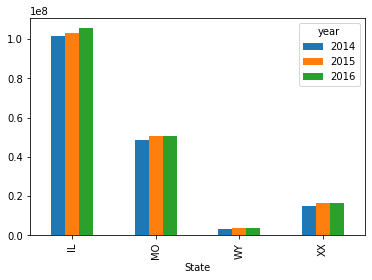

In [38]:
%matplotlib inline
answer.plot.bar()



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [39]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add week14_assignment.ipynb
    !git commit -a -m "Submitting the week 14 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


Already up to date.
[main 91e9dd5] Submitting the week 14 programming assignment
 2 files changed, 1199 insertions(+), 7 deletions(-)
 create mode 100644 week14/week14_assignment.ipynb
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 10.11 KiB | 5.06 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:ecdmdphd/hds5210-2022.git
   3589129..91e9dd5  main -> main
